### Import TensorFlow

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Piksel değerlerini normalize ederek 0/1 arasında bir değere atıyorum
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


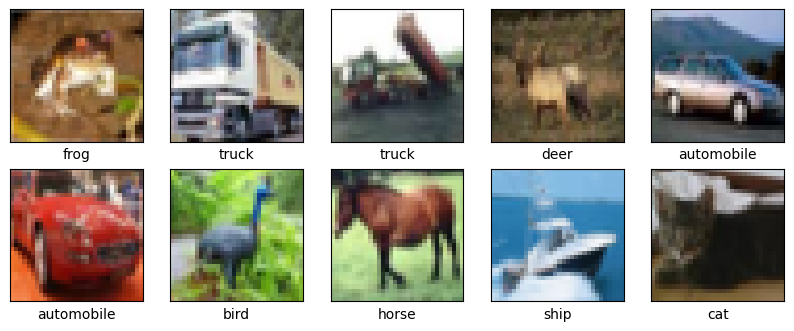

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

### Compile and train the model

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.2755 - accuracy: 0.5481 - val_loss: 1.0755 - val_accuracy: 0.6319
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0508 - accuracy: 0.6340 - val_loss: 0.9265 - val_accuracy: 0.6807
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9197 - accuracy: 0.6793 - val_loss: 0.8999 - val_accuracy: 0.6858
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8225 - accuracy: 0.7120 - val_loss: 0.8140 - val_accuracy: 0.7155
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7509 - accuracy: 0.7392 - val_loss: 0.8333 - val_accuracy: 0.7128
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6825 - accuracy: 0.7599 - val_loss: 0.7999 - val_accuracy: 0.7260
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6412 - accuracy: 0.7752 - val_loss: 0.7605 - val_accurac

### Evaluate the model

313/313 - 1s - loss: 0.7817 - accuracy: 0.7425 - 802ms/epoch - 3ms/step


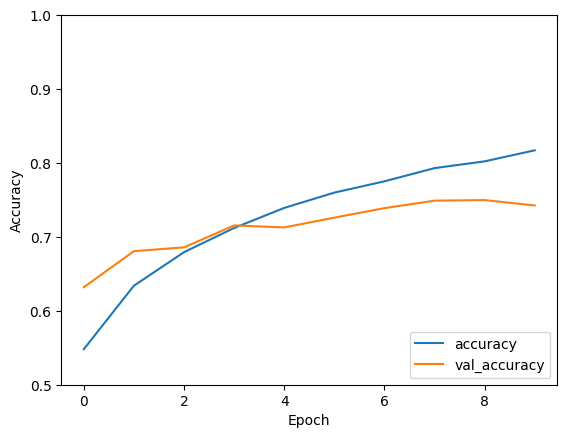

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [18]:
print(test_acc)

0.7425000071525574


In [19]:
prediction = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [20]:
# Sınıf etiketleri listesi
class_labels =['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# test_images üzerinde tahmin yapın
predictions = model.predict(test_images)
predicted_labels = [class_labels[np.argmax(pred)] for pred in predictions]  # En yüksek olasılığa sahip sınıfın ismini al
# Model doğruluk değerini hesaplama
accuracy = model.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.7817 - accuracy: 0.7425


In [ ]:
prediction_probabilities = []

for i in predictions:
  print(i)
  prediction_probabilities.append(i[np.argmax(i)])

In [ ]:
prediction_probabilities

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predictions

array([[2.98559908e-02, 9.37666162e-04, 5.15603321e-03, ...,
        1.30734965e-03, 1.96243785e-02, 6.23479206e-03],
       [2.20031328e-02, 1.60560701e-02, 2.13507174e-05, ...,
        7.93198129e-09, 9.60656464e-01, 1.23709394e-03],
       [1.96672410e-01, 6.79842457e-02, 1.60157792e-02, ...,
        4.26908815e-03, 6.18456304e-01, 5.72347157e-02],
       ...,
       [2.69771146e-04, 2.62006826e-04, 4.86623272e-02, ...,
        1.08778914e-02, 2.57962995e-04, 1.37094845e-04],
       [3.57657485e-03, 9.88167465e-01, 6.20262523e-04, ...,
        1.11212044e-04, 2.58210552e-04, 5.87697979e-03],
       [1.52977245e-05, 3.33567868e-07, 2.05354663e-04, ...,
        8.98027062e-01, 8.72442243e-08, 2.12734403e-06]], dtype=float32)

In [ ]:
np.argmax(predictions[3])

0

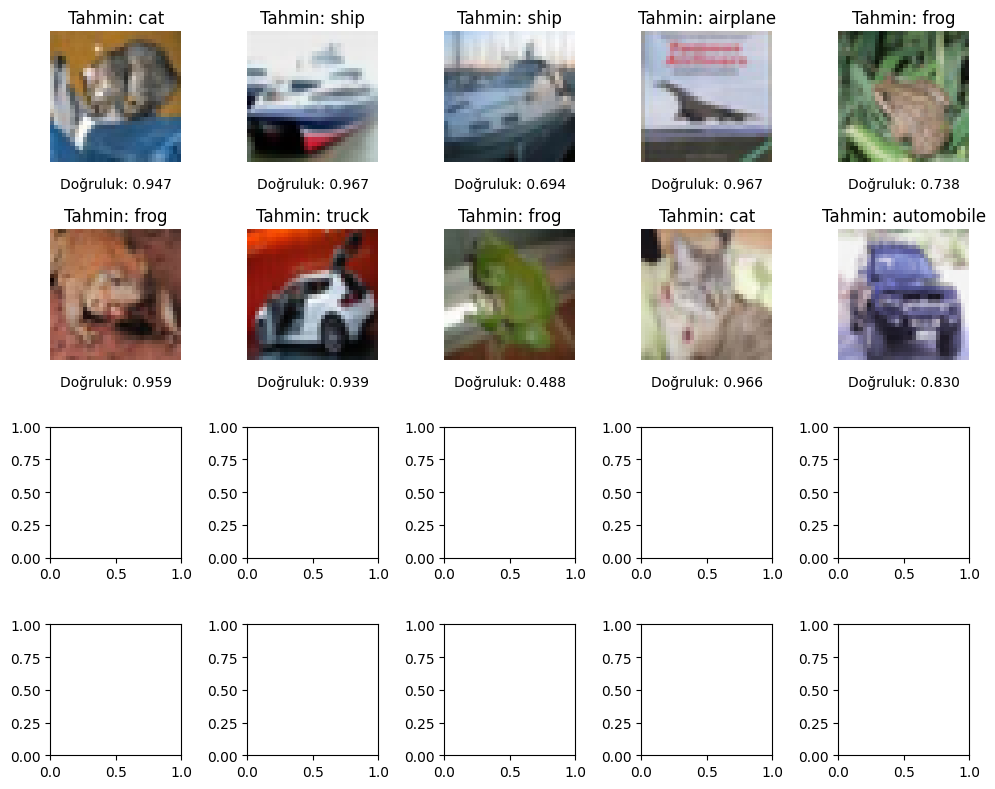

In [23]:
# Sadece ilk 20 tahmini görüntüleme
num_predictions = 10
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))

for i in range(num_predictions):
    ax = axes[i // 5, i % 5]
    ax.imshow(test_images[i], cmap='gray')  # Tahmin etmek istediğimiz görüntülerin olduğu test_images
    ax.set_title(f'Tahmin: {predicted_labels[i]}')  # Tahmin edilen etiketin ismini başlık olarak ayarlama
    ax.axis('off')

    # Tahmin sonucunu ve doğruluk değerini fotoğrafın üstünde gösterme
    ax.text(0.5, -0.2, f'Doğruluk: {prediction_probabilities[i]:.3f}', transform=ax.transAxes, ha='center', fontsize=10)

plt.tight_layout()
plt.show()